# **Visualización**
# AE05. Introducción a Seaborn

Seaborn es una librería de visualizaciones estadísticas la cual está construida por sobre matplotlib. Esto último quiere decir que utiliza todos los elementos primitivos de matplotlib para hacer visualizaciones más atractivas que las que implementa matplotlib por defecto. Esta librera esa en funcionamiento desde diciembre del 2013, y provee múltiples gráficos para visualizar variables numéricas y categóricas. En esta clase vamos a ver la mayoría de estos métodos y aplicarlos en múltiples sets de datos.


##<font color='blue'>¿Cómo empezamos a trabajar con seaborn?</font>

En este caso, la recomendación va por instalar anaconda [(link)](https://www.anaconda.com/products/individual), la cual viene con un conjunto de librerías preinstaladas para computación científica y Data Science. Con esto la instalación y/o actualización de esta librería puede realizar con cualquiera de estos dos simples comandos:

1.- Utilizando el gestor de paquetes de anaconda
```bash
conda install seaborn
```
2.- Utilizando el gestor de paquetes de python (pip)
```bash
pip install seaborn
```

**Nota:** Al igual que con `matplotlib`, esta librería viene preinstalada en las sesiones de Google Colab

Una vez instalada, para poder empezar a graficar necesitamos importar las librerías de la siguiente forma:

```python
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline # Este activa el backend para jupyter, mostrando los gráficos en los resultados de las celdas

sns.set(context='notebook',style='darkgrid',palette='dark')
```
Importamos la librería de matplotlib (`import matplotlib.pyplot as plt`) debido a lo que detallamos anteriormente (Seaborn está construido sobre matplotlib).

Para Seaborn utilizamos normalmente el alias `sns`. Luego se llama al metodo `sns.set()` para parametrizar Seaborn con elementos de contexto de trabajo, paleta de colores, estilos de gráficos de seaborn, etc.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ #Revisamos que estemos en la última versión de seaborn

'0.11.2'

In [ ]:
# Importamos las librerias adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Vamos a realizar un primer gráfico, pero con `matplotlib`. Esto lo realizamos para mostrar el antes y después del método `sns.set()`. En este caso graficando una curva con el método `plt.plot`:

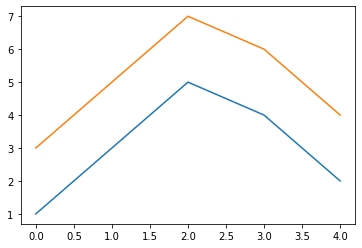

In [ ]:
plt.plot([1,3,5,4,2])
plt.plot([3,5,7,6,4])
plt.show()

Ahora aplicaremos el método `sns.set()` con los parámetros por defecto. Como tal, este método es un alias del método `sns.set_theme()` y por lo mismo, se pueden utilizar ambos de la misma forma.

Los principales parámetros que reciben son los siguientes:

- 'context': Corresponde al contexto en que se presentaran los gráficos, y esto se traduce en un escalamiento de las figuras y artistas que la componen. Los posibles valores son: `['paper', 'notebook', 'talk', 'poster']` y estos llevan una escala de `[0.8, 1, 1.3, 1.6]` respectivamente.
- 'style': Controla la estética del gráfico. Principalmente manejo de fondos y la inserción de grillas. Los posibles valores son:`['darkgrid', 'whitegrid', 'dark' ,'white']`
- 'palette': Controla la paleta de colores a utilizar. En este caso, se cambian los colores que vienen por defecto de matplotlib, con múltiples opciones las cuales pueden ser:
    - Nombre de una paleta de seaborn ('deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind')
    - Nombre de un colormap de matplotlib
    - Paletas de [husl](https://seaborn.pydata.org/generated/seaborn.husl_palette.html)
    - Paletas de [cubehelix](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html) [Paletas de cubehelix](https://jiffyclub.github.io/palettable/cubehelix/)
- 'font': Controla cual font (o tipo de letra para el texto a graficar) se va a utilizar. Para saber cuáles son los *font* instalados, se puede utilizar la siguiente secuencia de comandos de python:

```python
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
```


Finalmente, en manejos de estilos uno puede utilizar el método `plt.xkcd()`. **¿Se les ocurre qué puede generar este estilo :)?**

**Nota:** Para revertir esto último (y toda la aplicación del método `sns.set()`), pueden utilizar el método `plt.rcdefaults()`.


In [ ]:
sns.set(context='paper',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

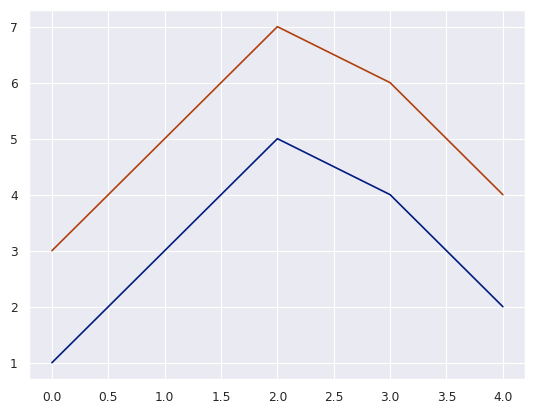

In [ ]:
plt.plot([1,3,5,4,2])
plt.plot([3,5,7,6,4])
plt.show() #Nuestras lineas ahora tendran una grilla visible y un color mas oscuro para la paleta de colores

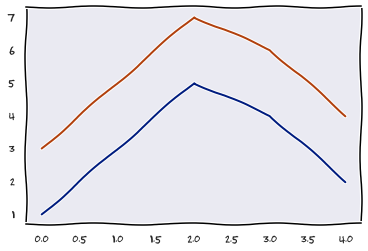

In [ ]:
plt.xkcd()
plt.plot([1,3,5,4,2])
plt.plot([3,5,7,6,4])
plt.show() #Nuestras lineas ahora tendran una grilla visible y un color mas oscuro para la paleta de colores

In [ ]:
plt.rcdefaults()

In [ ]:
sns.set()

Vamos a importar un dataset para poder graficar múltiples tipos de datos y así explorar las opciones que nos entrega `seaborn`.

In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


# <font color='blue'>Diagramas de dispersión (Scatterplot)</font>

A diferencia de la clase de matplotlib, el "hola mundo" que vamos a realizar con Seaborn corresponde a los diagramas de dispersión. Vamos a explorar el cómo crear estos diagramas, pero también vamos a explorar las ventajas que ofrece seaborn aparte de generar estilos con una buena estética. En primer lugar, vamos a graficar utilizando el set de datos de los Pingüinos de Palmer las columnas `bill_length_mm` `bill_depth_mm`. En este caso, la primera alternativa a realizar corresponde a utilizar lista/arreglos/series para los parámetros `x` e `y`. Luego, para graficar utilizamos el método `sns.scatterplot(x=X,y=Y)`

[Documentación Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)



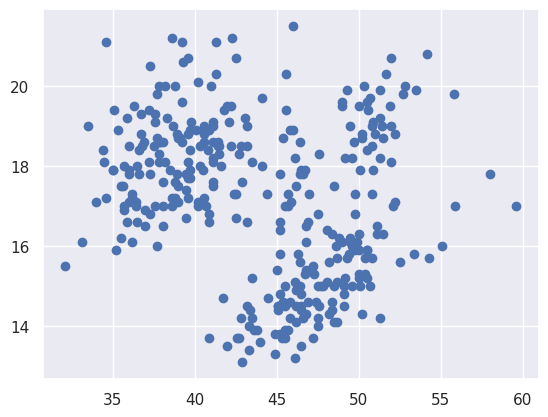

In [ ]:
plt.scatter(penguins_df['bill_length_mm'], penguins_df['bill_depth_mm'])
plt.show()

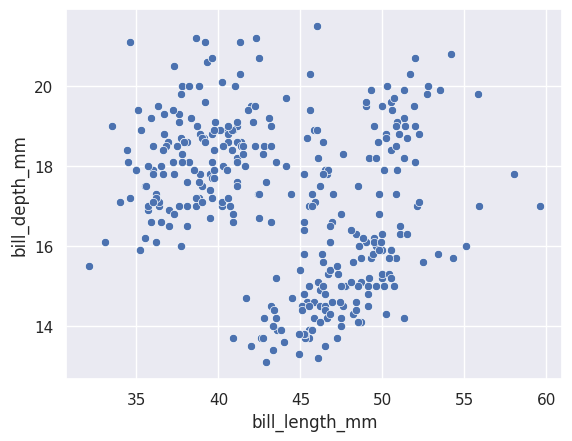

In [ ]:
#Tal como matplotlib, solo tenemos que llamar al método de scatterplot, y definir nuestros parámetros. 
#En este caso va a haber una diferencia crucial
sns.scatterplot(x=penguins_df['bill_length_mm'], y = penguins_df['bill_depth_mm'])
plt.show()

Si se fijan, automáticamente se añadieron las etiquetas para cada uno de los ejes X e Y. Esto sucede principalmente por que Seaborn está pensado en una completa integración con Pandas. En este caso como a los parámetros `x` e `y` son series de Pandas (las cuales tienen un nombre asociado a la columna a la que corresponden), automáticamente Seaborn va a generar las etiquetas en distintos niveles cuando correspondan. No obstante, nosotros de igual manera podríamos modificar cara elemento del gráfico utilizando todos los métodos vistos para matplotlib.

La otra forma de utilizar los métodos de Seaborn, y que en este caso es la buena práctica, corresponde al uso del parámetro `data` el cual debería recibir un `DataFrame`. Este parámetro permitirá a `seaborn` consultar directamente a la fuente de datos con respecto a las columnas que existen en dicho `DataFrame`. Por lo mismo, nosotros ahora para definir nuestros parámetros `x` e `y` simplemente utilizaremos los nombres de las columnas presentes en nuestro `DataFrame`. Veamos el ejemplo:

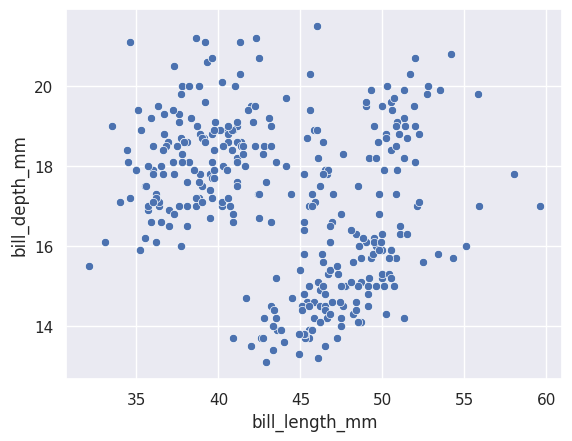

In [ ]:
#Si bien esto genera el mismo gráfico que antes, esta sintaxis corresponde a una buena práctica
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm', data=penguins_df)
plt.show()

Tal como mencionábamos, `Seaborn` está construido por sobre `matplotlib` y podemos utilizar ambas librerías obteniendo lo mejor de ambas: La capacidad y facilidad de graficar con `Seaborn` y el control total de nuestra visualización con `matplotlib`. 

A modo de ejemplo, vamos a utilizar los `subplots` de matplotlib para dividir el espacio a graficar y vamos a repetir ambos gráficos vistos anteriormente. Además de esto, vamos a añadir títulos a cada de uno de estos gráficos. La única diferencia ahora al momento de utilizar `seaborn` con subplots, es que nosotros tenemos que agregar el parámetro `ax` y el valor para este parámetro, corresponde al eje del subgráfico (`ax[0]` o `ax[0,0]` dependiendo de nuestra configuración).


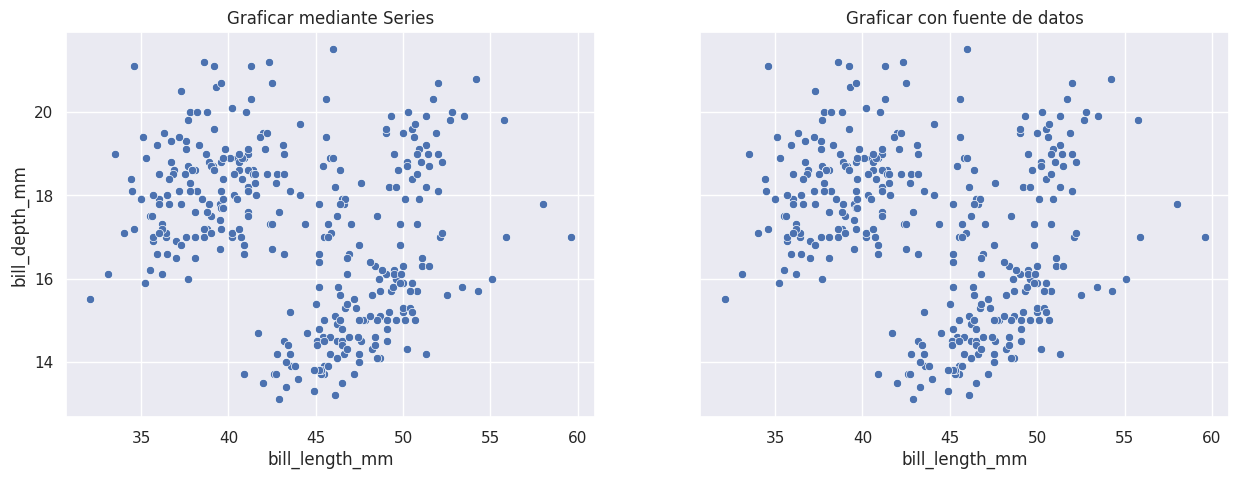

In [ ]:
#Generamos nuestro subplots
#sharey es compartir el eje "y"
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
#Graficamos con el primer metodo en el primer subplot
sns.scatterplot(x=penguins_df['bill_length_mm'], y=penguins_df['bill_depth_mm'], ax=ax[0])
#Graficamos con el segundo metodo en el segundo subplot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',data=penguins_df, ax=ax[1])

#Añadimos los titulos correspondientes.
ax[0].set_title("Graficar mediante Series")
ax[1].set_title("Graficar con fuente de datos")
plt.show()

Supongamos ahora que queremos colorear por la variable especie. Solo a modo de recordatorio se va a mostrar el código presentado en la clase pasada:

```python
fig, ax = plt.subplots(1,1,figsize=(10,10))

sorted_df = iris_df.sort_values(['Species'])# Ordenamos el dataframe por Species

setosa_df = sorted_df.iloc[0:50 , :]  #Generamos una seccion del dataframe para iris setosa
versicolor_df = sorted_df.iloc[50:100 , :] # lo mismo para iris versicolor
virginica_df = sorted_df.iloc[100:150:, :] # y finalmente para iris virginica

color1 = "#f97306" # Naranjo en formato RGB Hexadecimal para Iris-Setosa       
color2 = 'Blue' # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = 'xkcd:apple green' # "Verde manzana" en formato xkcd para Iris-Virginica

ax.scatter(setosa_df['PetalWidthCm'], setosa_df['PetalLengthCm'], color = color1, label='Setosa') #Scatter para Setosa, con solo una instancia del color y el label para setosa
ax.scatter(versicolor_df['PetalWidthCm'], versicolor_df['PetalLengthCm'], color = color2, label='Versicolor')  #Scatter para Versicolor
ax.scatter(virginica_df['PetalWidthCm'], virginica_df['PetalLengthCm'], color = color3, label='Virginica') #Scatter para Virginica

ax.legend() #Añadimos la leyenda, la cual va a respetar los colores utilizados.

plt.show()
```

Para pintar distintos colores, teníamos que llamar varias veces al método `ax.scatter` o en su defecto definir la lista de colores para cada uno de los puntos. Sea como sea, involucraba varias operaciones para poder llegar al resultado final. 

Utilizando Seaborn, esto ahora es bastante más sencillo. Para colorear por una columna en específico, tenemos que utilizar el parámetro `hue` y el valor tiene que ser la columna como tal. Entonces el código que eran múltiples líneas, ahora queda resumido en una sola línea:


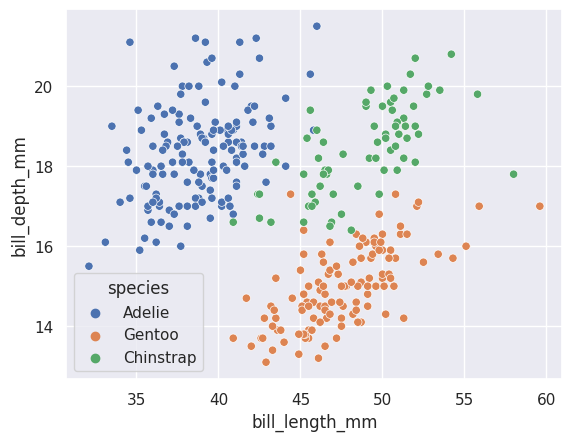

In [ ]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',
                data=penguins_df,
                hue='species')
plt.show()

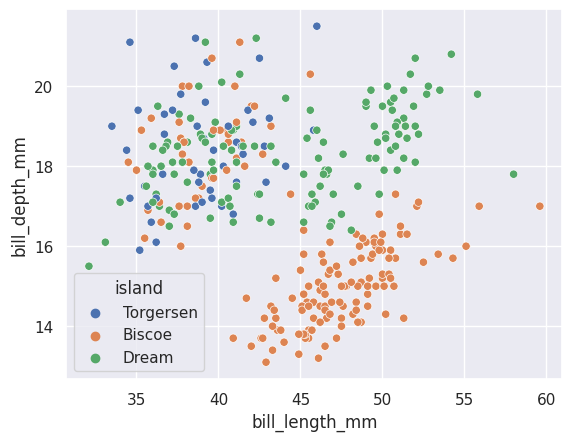

In [ ]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',
                data=penguins_df,
                hue='island')
plt.show()

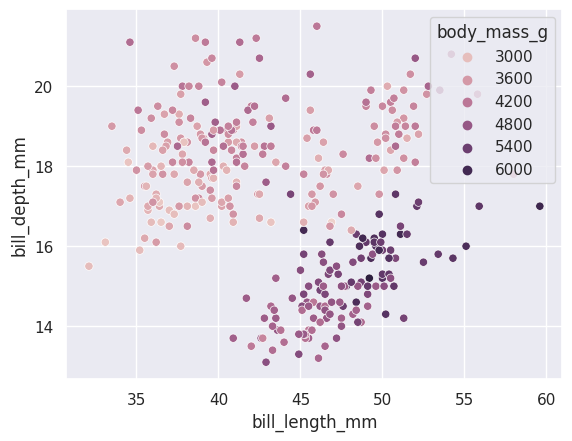

In [ ]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',
                data=penguins_df,
                hue='body_mass_g')
plt.show()

Aparte de pintar colores para cada uno de los puntos de forma rápida y sencilla, `Seaborn` por defecto añade la leyenda asociada a cada uno de los colores pintados en el gráfico. En el mismo estilo para manipular colores, las distintas formas de los marcadores pueden modificado con un simple parámetro: `style`. De la misma forma, los distintos marcadores se agregarán a la leyenda del gráfico.

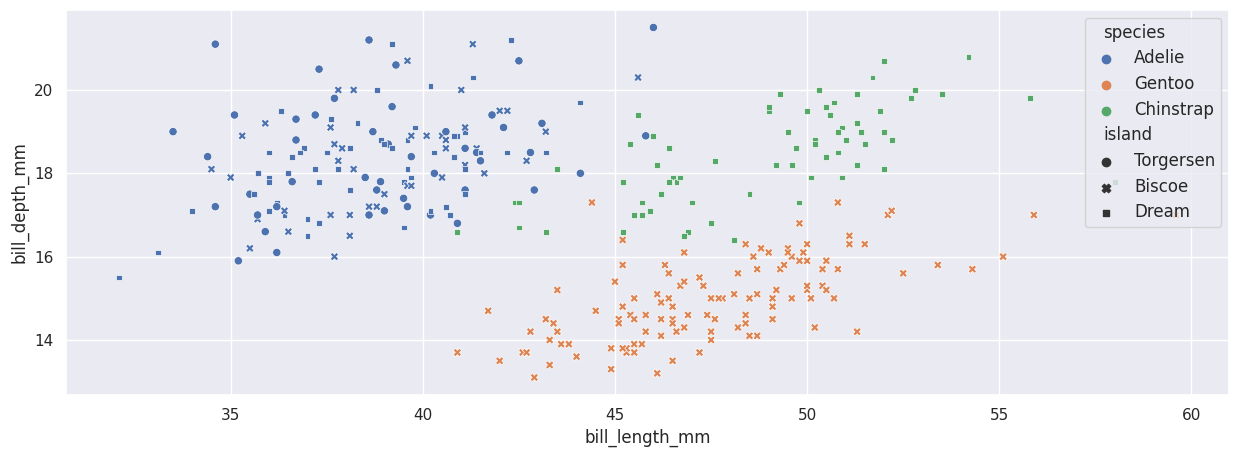

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',
                data=penguins_df,
                hue='species', 
                style='island')
plt.show()

Finalmente, podemos agregar una dimensión más a nuestro gráfico asignándole tamaño a cada uno de los puntos según una columna. **Ojo** que la columna puede ser tanto numérica, como valores categóricos, para las cuales Seaborn manejará automáticamente la escalas de éstas. Los parámetros a utilizar son `size` para asignar la columna y `sizes` para definir los valores mínimos y máximos de los tamaños asociados al gráfico. Este último parámetro corresponde a una tupla/arreglo de dos elementos con el valor mínimo y máximo.

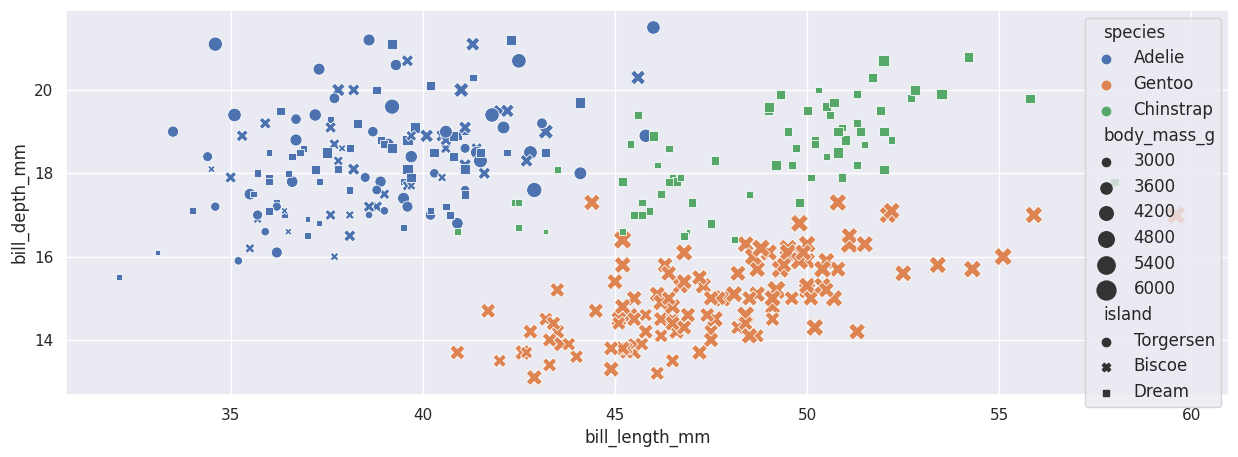

In [ ]:
plt.figure(figsize=(15,5))
#Vamos agregando
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',
                data=penguins_df,
                hue='species', 
                style='island', 
                size="body_mass_g",
                sizes=(20, 200))
plt.show()

Podemos ver que nuestra leyenda está generando problemas debido a lo grande que es (bloquea un par de puntos). Cuando nosotros llamamos algún método de `Seaborn` para graficar, este por defecto va a retornar un objeto artista de `matplotlib`. Entonces, nosotros podemos aprovechar la interfaz orientada a objetos para modificar específicamente el gráfico retornado:

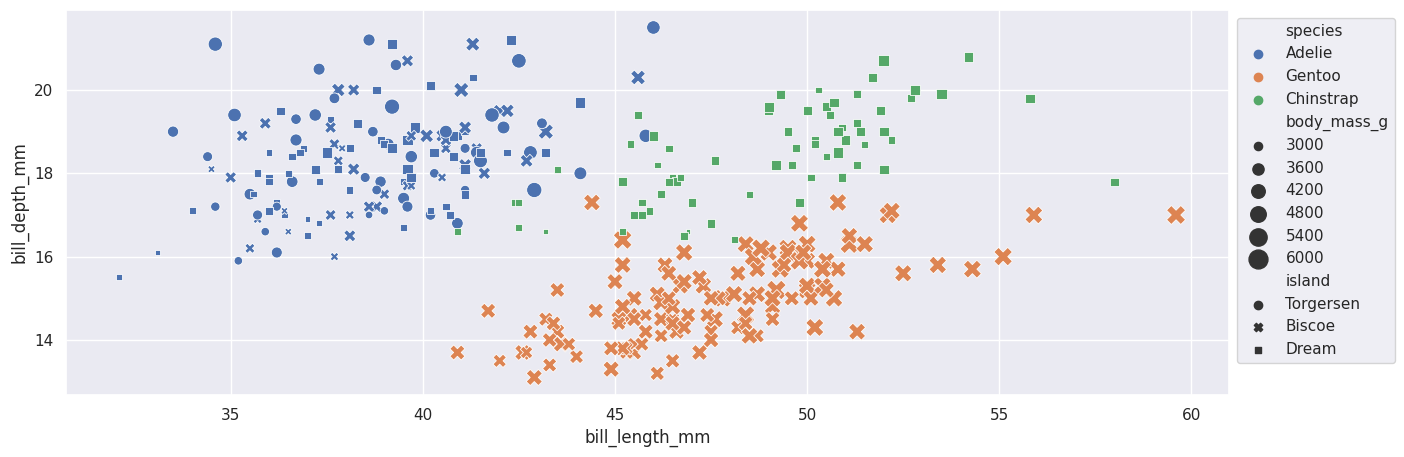

In [ ]:
plt.figure(figsize=(15,5))
# Vamos a guardar el artista retornado en la variable ax
ax = sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df,hue='species', style='island', size="body_mass_g",sizes=(20, 200))
# y modificamos el "bounding box" de la leyenda desplazandola a la derecha 
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()